In [1]:
import os
import glob
import pandas as pd
import numpy as np
from PIL import Image
import re

files = glob.glob('2017ダイコン写真/*.jpg')

df = pd.DataFrame(columns =['filename', 'year','spacies', 'block', 'shape','sn'])

# 表データの生成
for f in files:    
    fname = os.path.basename(f)
    try:
        (year,spacies, block, shape,sn,_) = re.findall(r'(\d+|\D+)',fname)
        sn = ('00'+sn)[-3:]
    except:
        continue
    sd = pd.Series({'filename':fname, 'year':year, 'spacies':spacies, 'block':block, 'shape':shape,'sn':sn })
    df = df.append(sd, ignore_index=True)
    df = df.sort_values(by=['spacies','block','shape','sn'])   

In [ ]:
# 4分の１サイズの画像生成
'''for f in files:  
    fname = os.path.basename(f)
    img = Image.open(f)
    img_resize = img.resize((int(img.width/4), int(img.height/4)))
    img_resize.save('qpics/' + fname)'''

In [2]:
df

,filename,year,spacies,block,shape,sn
0,17ajimal1a1.jpg,17,ajimal,1,a,001
1,17ajimal1a2.jpg,17,ajimal,1,a,002
2,17ajimal1a3.jpg,17,ajimal,1,a,003
3,17ajimal1a4.jpg,17,ajimal,1,a,004
4,17ajimal1a5.jpg,17,ajimal,1,a,005
5,17ajimal1a6.jpg,17,ajimal,1,a,006
6,17ajimal1a7.jpg,17,ajimal,1,a,007
7,17ajimal1a8.jpg,17,ajimal,1,a,008
8,17ajimal1a9.jpg,17,ajimal,1,a,009
9,17ajimal1a10.jpg,17,ajimal,1,a,010


In [7]:
spc = list(set(df['spacies']))

In [8]:
len(spc)

36

In [9]:
360*4

1440

In [205]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = 'qpics/17ajimal1a1.jpg'
img = cv2.imread(filename)
gry = cv2.imread(filename,0)
gry3 = np.array([gry,gry,gry])
gry3 = gry3.transpose(1,2,0)

hight,width = gry.shape


In [209]:
height,width

(1000, 750)

In [207]:
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用
gmm=mixture.GaussianMixture(n_components=5,covariance_type='full')
fimg = img.reshape((height*width,3))
z_gmm=gmm.fit(fimg)

In [210]:
z_gmm.means_

array([[  84.75260349,   77.01935696,   68.98295787],
       [ 107.08375646,  195.74020644,  139.68257484],
       [  68.98280254,  131.18107059,   94.75199147],
       [ 194.61397757,  207.18736591,  210.57106198],
       [  83.53988121,   72.51843998,   60.72878655]])

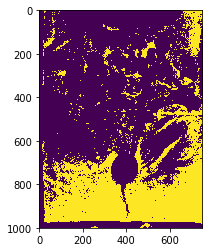

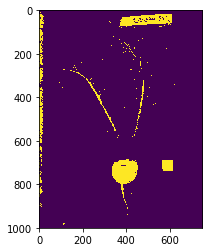

(<matplotlib.image.AxesImage at 0x11d0ff400>, None)

In [211]:
levels = []
maxlevel = np.linalg.norm([255.0,255.0,255.0])
print()
for m in z_gmm.means_:
    levels.append(np.linalg.norm(m))

levels = np.array(np.sort(levels))
blacklevel = levels[0]   # 黒領域の色ノルムの平均値
whitelevel = levels[-1] # 白領域の色ノルムの平均値

mask0 = np.zeros((height,width),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if np.linalg.norm(img[i][j]) < blacklevel:
            mask0[i][j] = 255

mask1 = np.zeros((height,width),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if np.linalg.norm(img[i][j]) > whitelevel:
            mask1[i][j] = 255
            
plt.imshow(mask0),plt.show()
plt.imshow(mask1),plt.show()

In [212]:
nlabels, labelimg, contours, CoGs = cv2.connectedComponentsWithStats(mask0)

In [213]:
nlabels

2724

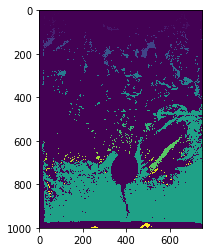

(<matplotlib.image.AxesImage at 0x11a6dd198>, None)

In [214]:
plt.imshow(labelimg),plt.show()

In [215]:
contours

array([[     0,      0,    750,   1000, 516626],
       [    14,      0,     14,     18,     76],
       [    61,      0,      1,      2,      2],
       ..., 
       [   509,    984,      9,      5,     16],
       [   519,    990,      2,      2,      2],
       [   235,    993,     38,      7,    193]], dtype=int32)

In [216]:
maxblackindex = np.argmax(contours[1:,4])

In [217]:
maxblackindex

1558

In [220]:
mask00 = np.uint8(labelimg==1559)*255

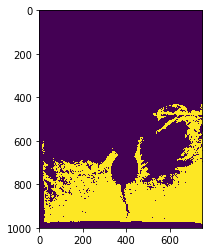

(<matplotlib.image.AxesImage at 0x11aaf3da0>, None)

In [221]:
plt.imshow(mask00),plt.show()

In [222]:
mask11 = np.uint

In [223]:
len(contours)

2724

In [224]:
nlabels1, labelimg1, contours1, CoGs1 = cv2.connectedComponentsWithStats(mask1)

In [225]:
nlabels1

730

In [226]:
maxwhiteindex = np.argmax(contours1[1:,4])
maxwhitearea = np.max(contours1[1:,4])
maxwhiteindex,maxwhitearea

(645, 11375)

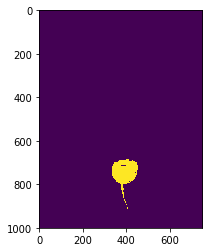

(<matplotlib.image.AxesImage at 0x128fc7ac8>, None)

In [228]:
mask11 = np.uint8(labelimg1==646)*255
plt.imshow(mask11),plt.show()

In [229]:
mask = np.ones((height,width),np.uint8)*2

In [230]:
mask[mask00==255]=0
mask[mask11==255]=1

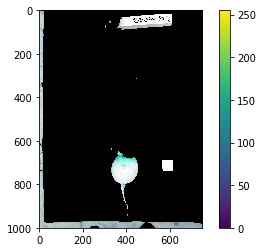

(<matplotlib.image.AxesImage at 0x11d07d860>,
 None)

In [231]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

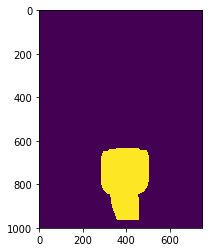

(<matplotlib.image.AxesImage at 0x1299a1f28>, None)

In [232]:
kernel = np.ones((100,100),np.uint8)
dilation =  cv2.dilate(mask11,kernel,iterations = 1)
plt.imshow(dilation),plt.show()

In [198]:
mask.shape

(1000, 650)

In [234]:
mask = np.ones((height,width),np.uint8)*3
mask[dilation==0]=0
mask[mask11==255]=1

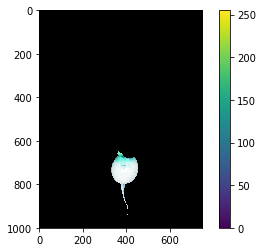

(<matplotlib.image.AxesImage at 0x129a86ba8>,
 None)

In [235]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

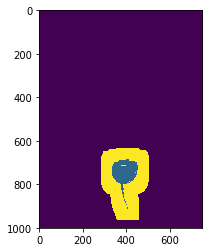

(<matplotlib.image.AxesImage at 0x12b271438>, None)

In [181]:
plt.imshow(mask),plt.show()

In [233]:
width

750